In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Dropout
from tensorflow.keras.models import Model

In [ ]:
file_path = "/content/drive/MyDrive/labeled_data.csv"
data = pd.read_csv(file_path)
data = data.drop(columns=['Name', 'RecipeId'])
data = data.sample(frac=1, random_state=42).reset_index(drop=True)
data.head()

,Calories,FatContent,SaturatedFatContent,SodiumContent,CarbohydrateContent,FiberContent,SugarContent,ProteinContent,DietKategori
0,324.3,25.1,9.1,714.2,4.2,2.3,0.6,20.2,2.0
1,535.4,37.8,12.0,1450.6,11.6,7.5,1.1,39.7,3.0
2,249.0,19.4,8.5,1312.5,17.5,6.1,4.0,6.2,3.0
3,353.9,7.3,1.3,946.5,52.8,13.0,3.6,21.8,2.0
4,36.2,0.6,0.1,31.1,7.5,2.0,3.9,1.7,1.0


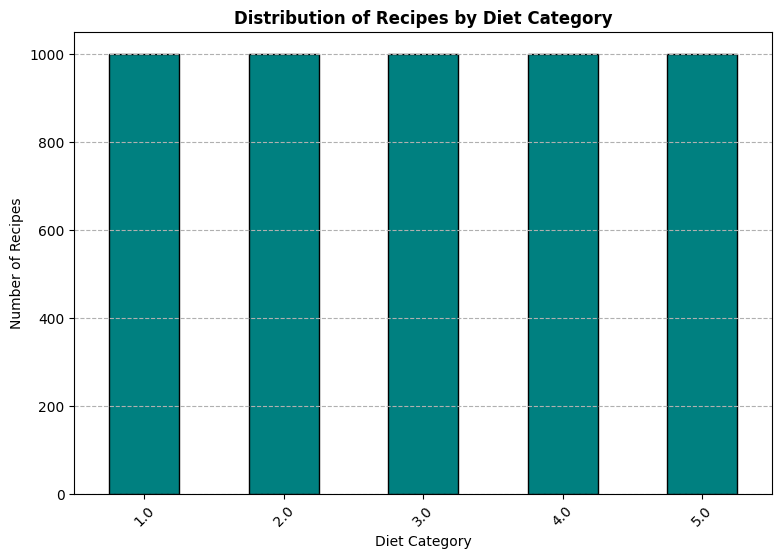

In [ ]:
# Create the bar plot
plt.figure(figsize=(9,6))
ax = diet_category_counts.plot(kind='bar', color='teal', edgecolor='black')

# Adding titles and labels
plt.title('Distribution of Recipes by Diet Category', weight='bold')
plt.xlabel('Diet Category')
plt.ylabel('Number of Recipes')
plt.xticks(rotation=45)

# Add grid lines and show it
plt.grid(axis='y', linestyle='--')
plt.show()


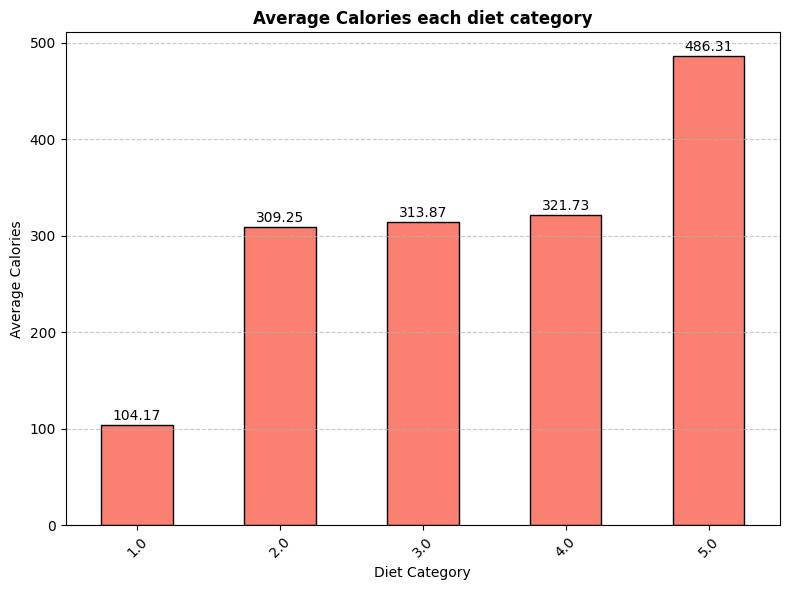

In [ ]:
# Average Calories each diet category
plt.figure(figsize=(8, 6))
ax = data.groupby('DietKategori')['Calories'].mean().sort_index().plot(kind='bar', color='salmon',edgecolor='black')
plt.title('Average Calories each diet category',weight='bold')
plt.xlabel('Diet Category')
plt.ylabel('Average Calories')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add precision number each bar
for i, value in enumerate(data.groupby('DietKategori')['Calories'].mean().sort_index()):
    ax.text(i, value + 5, f'{value:.2f}', ha='center')

plt.tight_layout()
plt.show()


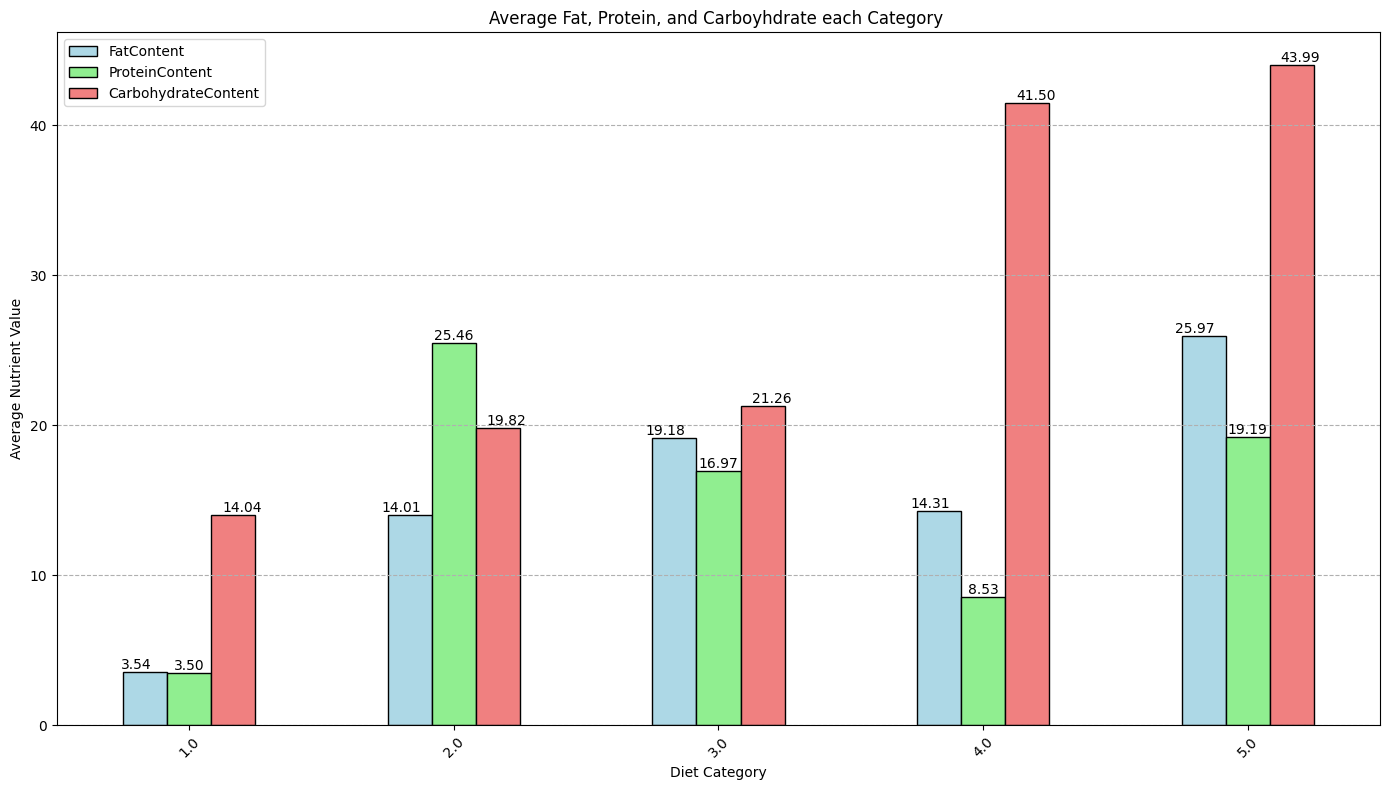

In [ ]:
# Average Fat, Protein, and Carboyhdrate
average_nutrients_by_diet = data.groupby('DietKategori')[['FatContent', 'ProteinContent', 'CarbohydrateContent']].mean()
ax = average_nutrients_by_diet.plot(kind='bar', figsize=(14, 8), edgecolor='black', color=['lightblue', 'lightgreen', 'lightcoral'])

# Precision Number
for i, category in enumerate(average_nutrients_by_diet.index):
    for j, nutrient in enumerate(average_nutrients_by_diet.columns):
        value = average_nutrients_by_diet.iloc[i, j]
        ax.text(i + (j - 1) * 0.2, value + 0.2, f'{value:.2f}', ha='center')

plt.title('Average Fat, Protein, and Carboyhdrate each Category ')
plt.xlabel('Diet Category')
plt.ylabel('Average Nutrient Value')
plt.xticks(rotation=45)

plt.grid(axis='y', linestyle='--')
plt.tight_layout()
plt.show()


In [ ]:
TRAIN_SIZE = 4000
X_train = data.iloc[:TRAIN_SIZE, :-1].values
y_train = data.iloc[:TRAIN_SIZE, -1].values
X_test = data.iloc[TRAIN_SIZE:, :-1].values
y_test = data.iloc[TRAIN_SIZE:, -1].values
y_train = y_train - 1
y_test = y_test - 1



In [ ]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((4000, 8), (4000,), (1000, 8), (1000,))

In [ ]:
train_dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train))
test_dataset = tf.data.Dataset.from_tensor_slices((X_test, y_test))

In [ ]:
train_dataset = train_dataset.shuffle(buffer_size=1250).batch(32).prefetch(tf.data.experimental.AUTOTUNE)
test_dataset = test_dataset.batch(32).prefetch(tf.data.experimental.AUTOTUNE)

In [ ]:
for feature_batch, label_batch in train_dataset.take(1):
    print("Features: ", feature_batch.numpy())
    print("Labels: ", label_batch.numpy())

Features:  [[[1.834e+02 1.490e+01 2.200e+00 ... 7.900e+00 3.100e+00 2.900e+00]
  [3.566e+02 1.670e+01 7.800e+00 ... 1.600e+00 2.910e+01 5.900e+00]
  [3.385e+02 1.110e+01 2.800e+00 ... 0.000e+00 0.000e+00 5.590e+01]
  ...
  [6.648e+02 3.170e+01 1.130e+01 ... 4.500e+00 4.200e+00 6.490e+01]
  [3.204e+02 1.630e+01 4.500e+00 ... 2.400e+00 1.900e+00 7.700e+00]
  [5.420e+01 3.100e+00 1.900e+00 ... 1.600e+00 3.500e+00 1.600e+00]]

 [[1.620e+01 0.000e+00 0.000e+00 ... 0.000e+00 3.600e+00 0.000e+00]
  [3.690e+02 1.810e+01 6.000e+00 ... 3.000e-01 6.800e+00 4.140e+01]
  [1.658e+02 4.100e+00 9.000e-01 ... 1.100e+00 6.600e+00 2.260e+01]
  ...
  [3.506e+02 1.340e+01 7.900e+00 ... 2.400e+00 3.150e+01 5.000e+00]
  [7.920e+01 3.000e-01 1.000e-01 ... 9.000e+00 4.500e+00 1.800e+00]
  [4.681e+02 2.850e+01 1.250e+01 ... 3.000e-01 2.000e+00 3.950e+01]]

 [[4.102e+02 1.560e+01 4.400e+00 ... 5.100e+00 5.600e+00 4.330e+01]
  [1.892e+02 7.800e+00 4.700e+00 ... 2.600e+00 1.800e+00 8.800e+00]
  [2.658e+02 1.110e+0

In [ ]:
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.regularizers import l2
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.optimizers import RMSprop

# Model Functional API
inputs = Input(shape=(X_train.shape[1],))  # Jumlah fitur X_train

#first layer
x = Dense(64, activation='relu', kernel_regularizer=l2(0.001))(inputs)
x = BatchNormalization()(x)
x = Dropout(0.0001)(x)

#second layer
x = Dense(128, activation='relu', kernel_regularizer=l2(0.001))(x)
x = BatchNormalization()(x)
x = Dropout(0.01)(x)

# third layer
x = Dense(256, activation='relu', kernel_regularizer=l2(0.001))(x)
x = BatchNormalization()(x)
x = Dropout(0.3)(x)

outputs = Dense(5, activation='softmax')(x)

#  model
model = Model(inputs=inputs, outputs=outputs)

# Kompilasi model dengan optimizer yang lebih stabil dan learning rate lebih kecil
optimizer = RMSprop(learning_rate=0.0005)

model.compile(optimizer=optimizer,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=0.000001)

# Melatih model tanpa EarlyStopping (untuk melatih lebih lama)
history = model.fit(train_dataset, epochs=200, batch_size=64,
                    validation_data=test_dataset,
                    callbacks=[reduce_lr])


Epoch 1/200
125/125 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.4728 - loss: 1.6355 - val_accuracy: 0.3060 - val_loss: 1.7020 - learning_rate: 5.0000e-04
Epoch 2/200
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6280 - loss: 1.3154 - val_accuracy: 0.4400 - val_loss: 1.4752 - learning_rate: 5.0000e-04
Epoch 3/200
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6579 - loss: 1.1504 - val_accuracy: 0.5920 - val_loss: 1.2459 - learning_rate: 5.0000e-04
Epoch 4/200
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6931 - loss: 1.0475 - val_accuracy: 0.6750 - val_loss: 1.1540 - learning_rate: 5.0000e-04
Epoch 5/200
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7219 - loss: 0.9605 - val_accuracy: 0.6670 - val_loss: 1.1284 - learning_rate: 5.0000e-04
Epoch 6/200
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7364 - loss: 0.9348 - val_accuracy: 0.6680 - val_loss: 1.0789 - learning_rate: 5.0000e-04
Epoch 7/200
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - acc

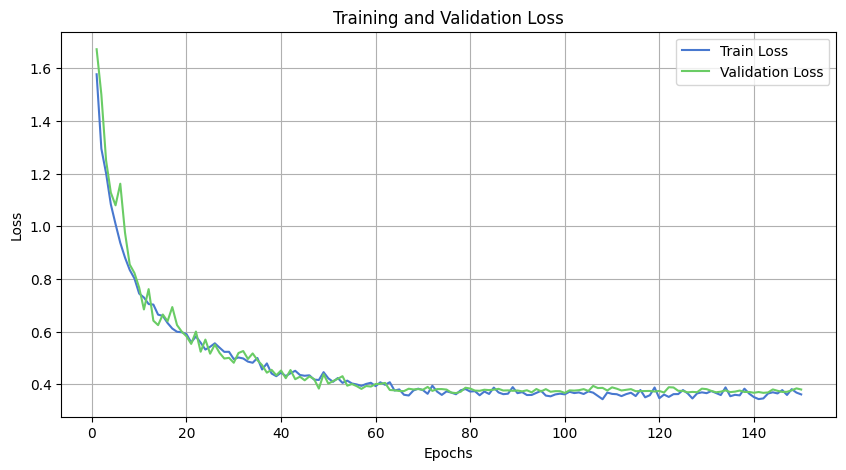

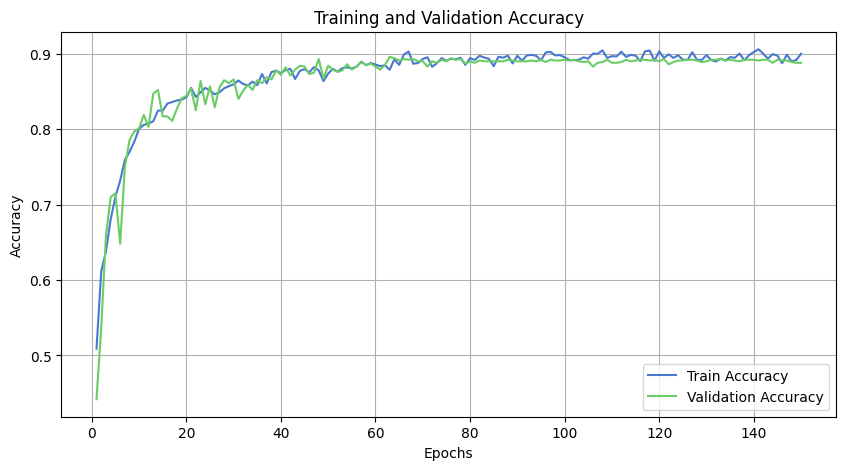

In [ ]:
import matplotlib.pyplot as plt

# Access history data using attributes
epochs = range(1, len(history.history['loss']) + 1)  # Get epoch numbers
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

# Plot Loss
plt.figure(figsize=(10, 5))
plt.plot(epochs, train_loss, label="Train Loss")
plt.plot(epochs, val_loss, label="Validation Loss")
plt.title("Training and Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.grid()
plt.show()

# Plot Accuracy
plt.figure(figsize=(10, 5))
plt.plot(epochs, train_accuracy, label="Train Accuracy")
plt.plot(epochs, val_accuracy, label="Validation Accuracy")
plt.title("Training and Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.grid()
plt.show()

In [ ]:
model.save('model.h5')

In [ ]:
# Mengonversi model ke format TFLite
converter = tf.lite.TFLiteConverter.from_keras_model(model)  # Bisa juga gunakan from_saved_model jika model sudah disimpan
tflite_model = converter.convert()

# Menyimpan model TFLite ke file .tflite
with open('model.tflite', 'wb') as f:
    f.write(tflite_model)


Saved artifact at '/tmp/tmp9wec382i'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 8), dtype=tf.float32, name='keras_tensor_437')
Output Type:
  TensorSpec(shape=(None, 5), dtype=tf.float32, name=None)
Captures:
  139986319966624: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139986319974016: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139986320615280: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139986320613696: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139986285798048: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139986320607536: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139986320610880: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139986320614224: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139986320616160: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139986320617744: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139986320615104: Ten